# Advertising Sales Channel Prediction

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Advertising.csv

### Importing Library

In [18]:
#database
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#save

import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


Unanamed column contain id so we can drop it.

Target value is continious data so its a regression problem.

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

### Missing Value & Non numeric Test

In [4]:
print(data.shape)
data.info()

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


All features are float dataype and having no null values.

In [5]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### Duplicacy Test

In [6]:
#checking duplicacy & found no duplicate data.

dup=data.duplicated()

dup.sum()

0

In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Dataset looks good with describe

### Correlation using heatmap

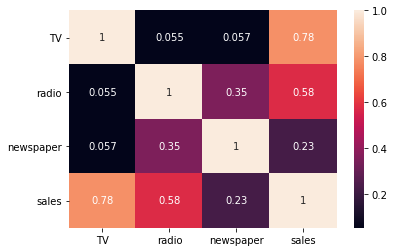

In [8]:
sns.heatmap(data.corr(),annot=True)
plt.show()

Its clearly showing postive correlation of all features with target(sales).

Feature(TV) has maximum relation & newspaper has least.
 
No Multicollinearity showing amongs features.

### Scatterplot

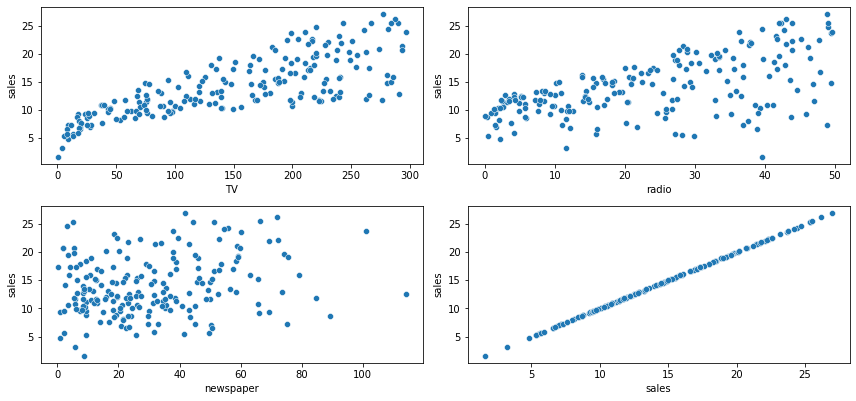

In [9]:
plt.figure(figsize=(12,8))

plotnumber=1

for col in data:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(x=col,y='sales',data=data)
        
    plotnumber+=1

plt.tight_layout()   

Its clearly reflecting positive relation but newspaper have least relation same thing observed in heatmap as well

### Data distribution & skewness

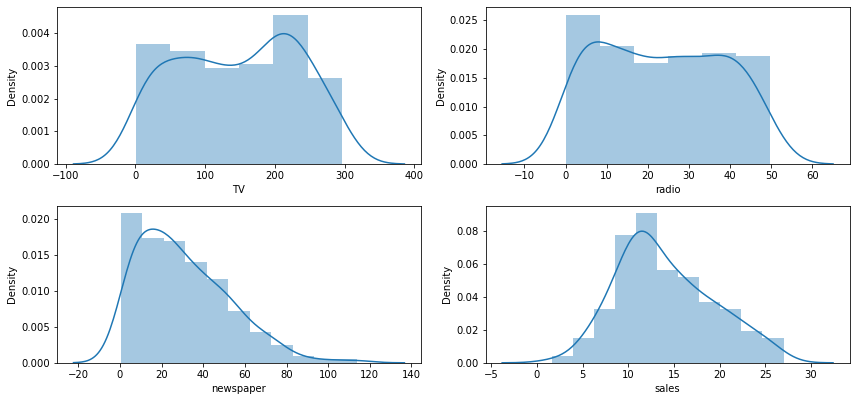

In [10]:
plt.figure(figsize=(12,8))

plotnumber=1

for col in data:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1

plt.tight_layout() 

Data is somewhat normally distributed but not completely but as we have only 200 data points so cant affort to loss any data points. so we will continue with same data.

In [11]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is not much skewness in data , only newspaper showing some skewness which is acceptable accrdong to data set. so not keeping it as its.

### Scaling

In [12]:
X=data.drop(columns=['sales'])
y=data.sales
scaler=StandardScaler()

X_scale=scaler.fit_transform(X)

### Train Test Split

In [13]:
#checking best random state
for i in range(10,100):
    x_train,x_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    print(r2_score(y_test,y_pred),i)

0.8366843974055227 10
0.8692372171143041 11
0.9074967628613593 12
0.9329679186406995 13
0.8697874025357979 14
0.9042108940079047 15
0.9063440181751056 16
0.8429263407537217 17
0.8768164503326362 18
0.8982572127330383 19
0.8601993386354956 20
0.9219136041031583 21
0.9144692690504648 22
0.9197128083738796 23
0.8877732345406748 24
0.8812441427551716 25
0.8778867145626432 26
0.8969447297214866 27
0.9051411159792939 28
0.9001120338383458 29
0.9191674086367524 30
0.9274788307471854 31
0.82440096322391 32
0.9217933306319247 33
0.9016142017731229 34
0.7747938634678531 35
0.9127563183970623 36
0.8797183787611138 37
0.8929040119659396 38
0.9067416005164273 39
0.8180628772556526 40
0.8962913252219633 41
0.8935163320163658 42
0.9288546462999523 43
0.8305483472800644 44
0.9035487616562978 45
0.8695983142378589 46
0.839164865048828 47
0.925995758804734 48
0.8049578006977758 49
0.8789006652994477 50
0.9019163360048594 51
0.8913454190688576 52
0.9193010386229922 53
0.9187017470701987 54
0.905762018175

### Model Building

In [14]:
#getting best score with random state 13

x_train,x_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25,random_state=13)

In [17]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

93.29679186406995
2.096387052750005
1.19572688330949
1.4478905527525223


### Logistic regression scoring 93.29% .. will try to some other algorithm to improve scoring. 

In [20]:
rfr=RandomForestRegressor()
sv=SVR()
abr=AdaBoostRegressor()

In [21]:
#RandomForestRegressor
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

97.77269864052317


In [22]:
#SVR
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

print(r2_score(y_test,y_pred)*100)

86.8007674790105


In [23]:
#AdaBoostRegressor

abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

94.37998540542482


Linear Regression-93.29%

RandomForestRegressor=97.77%

SVR=86.80%

AdaBoostRegressor=94.37%

### Since RandomForestRegressor=97.77% producing highest score. will check with cross validation.

### Cross validation

In [25]:
from sklearn.model_selection import cross_val_score

In [33]:
cv_score=cross_val_score(lr,X_scale,y,cv=5)
print("CV score for LogisticRegression ",cv_score.mean()*100)

cv_score=cross_val_score(rfr,X_scale,y,cv=5)
print("\nCV score for RandomForest ",cv_score.mean()*100)

cv_score=cross_val_score(sv,X_scale,y,cv=5)
print("\nCV score for SVR ",cv_score.mean()*100)


cv_score=cross_val_score(abr,X_scale,y,cv=5)
print("\nCV score for AdaBoostRegressor ",cv_score.mean()*100)


CV score for LogisticRegression  88.71063495438435

CV score for RandomForest  97.52075957686081

CV score for SVR  90.1671440580458

CV score for AdaBoostRegressor  95.50420049612775


#### RandomForestRegressor=97.77% & CV Score=97.52% . its best model will try hyperparametertunning

### Hyper Parameter Tunning

In [89]:
params={'bootstrap': [True, False],
 'max_depth': [5, 8, 15, 20, 25],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5,10,15,20,25,40,60]}

grd=GridSearchCV(rfr,param_grid=params)

grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=16, n_estimators=41),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 8, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 20, 25, 40, 60]})

In [123]:
print(grd.best_params_)

rfr=RandomForestRegressor(bootstrap=True, max_depth= 81,min_samples_leaf= 1, min_samples_split= 2, n_estimators=37)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

{'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
98.32836118950694


We successfully improved score after tunning its around 98%

### Final Score with Random Forest Regressor

In [124]:
print('R Squared score: ',r2_score(y_test,y_pred)*100)
print('\nMean squared error: ',mean_squared_error(y_test,y_pred))
print('\nMean absolute error: ',mean_absolute_error(y_test,y_pred))
print('\nRoot mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

R Squared score:  98.32836118950694

Mean squared error:  0.5227947406866317

Mean absolute error:  0.5710270270270267

Root mean square error:  0.7230454623926712


### Model Save

In [125]:
filename='sales_chennals.pickle'

pickle.dump(rfr,open(filename,'wb'))